In [84]:
from google.colab import files

upload = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [85]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
df.shape

(768, 9)

In [87]:
print('\n',df.info())
print('\n',df.isnull().sum())
print('\nthe number of dublicate data is :',df.duplicated().sum())
print('\n',df.describe())
print('\nthe mode is:',df.mode())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

 None

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                  

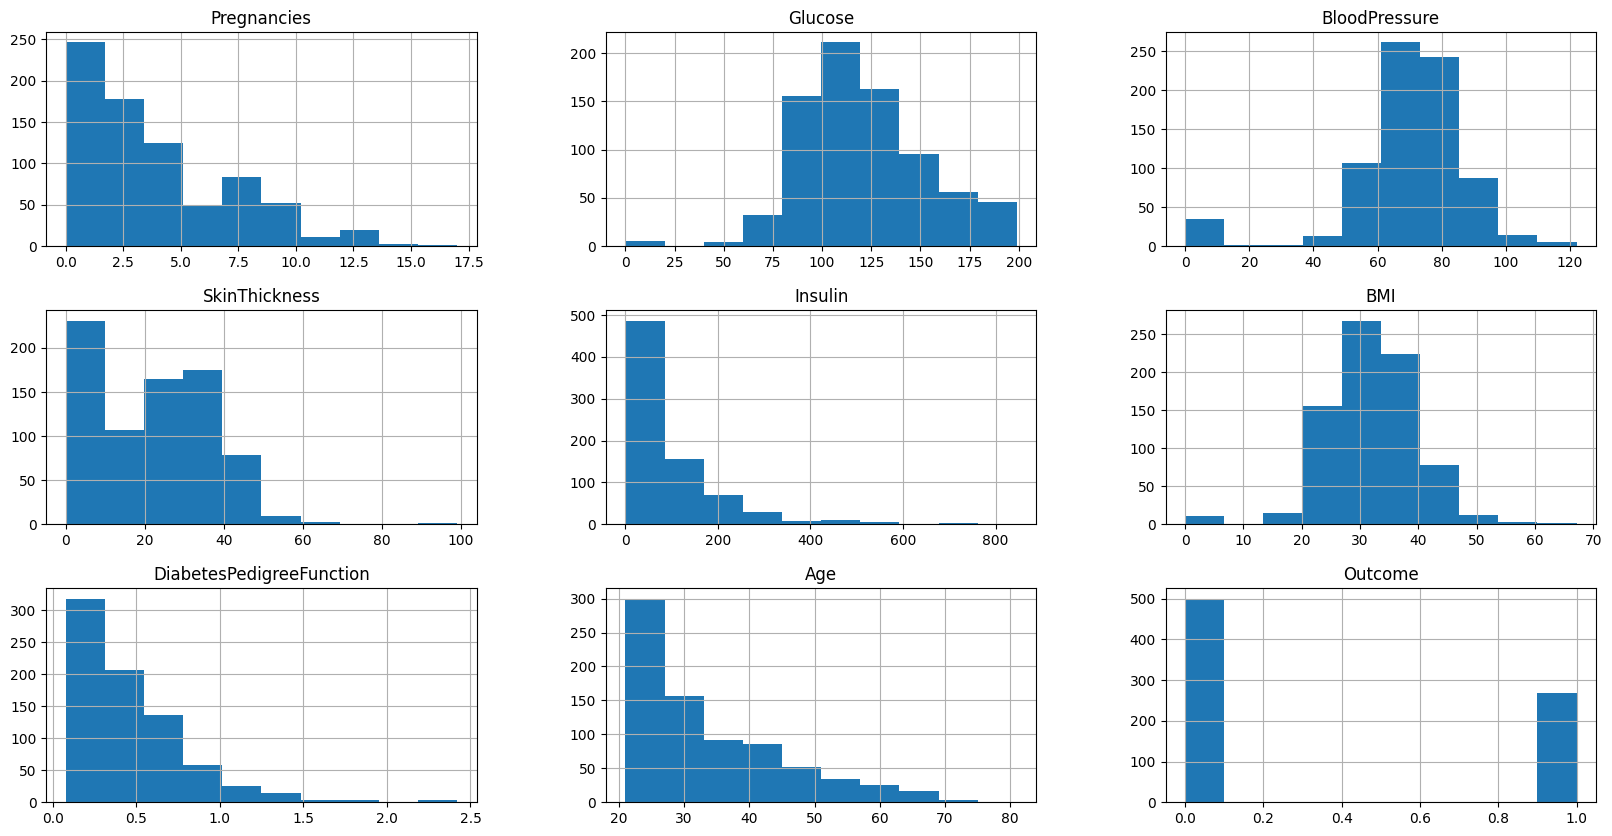

In [88]:
df.hist(figsize=(20,10));

In [89]:
columns = df.columns

outline_datas = {}
clean_datas  = {}

for i in columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_bound = Q1-1.5*IQR
  uper_bound=Q3+1.5*IQR
  outline_datas[i] = df[i][(df[i]<lower_bound)|(df[i]>uper_bound)].dropna().values
  clean_datas[i] = df[i][(df[i]>=lower_bound)&(df[i]<=uper_bound)].dropna().values

outline_datas

{'Pregnancies': array([15, 17, 14, 14]),
 'Glucose': array([0, 0, 0, 0, 0]),
 'BloodPressure': array([  0,   0,  30, 110,   0,   0,   0,   0, 108, 122,  30,   0, 110,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 108,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 110,   0,  24,   0,   0,
          0,   0, 114,   0,   0,   0]),
 'SkinThickness': array([99]),
 'Insulin': array([543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375,
        545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600,
        321, 440, 540, 480, 335, 387, 392, 510]),
 'BMI': array([ 0. ,  0. ,  0. ,  0. , 53.2, 55. ,  0. , 67.1, 52.3, 52.3, 52.9,
         0. ,  0. , 59.4,  0. ,  0. , 57.3,  0. ,  0. ]),
 'DiabetesPedigreeFunction': array([2.288, 1.441, 1.39 , 1.893, 1.781, 1.222, 1.4  , 1.321, 1.224,
        2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731,
        1.268, 1.6  , 2.42 , 1.251, 1.699, 1.258, 1.282, 1.698, 1.461,
        1.292, 1.394]),
 'Age

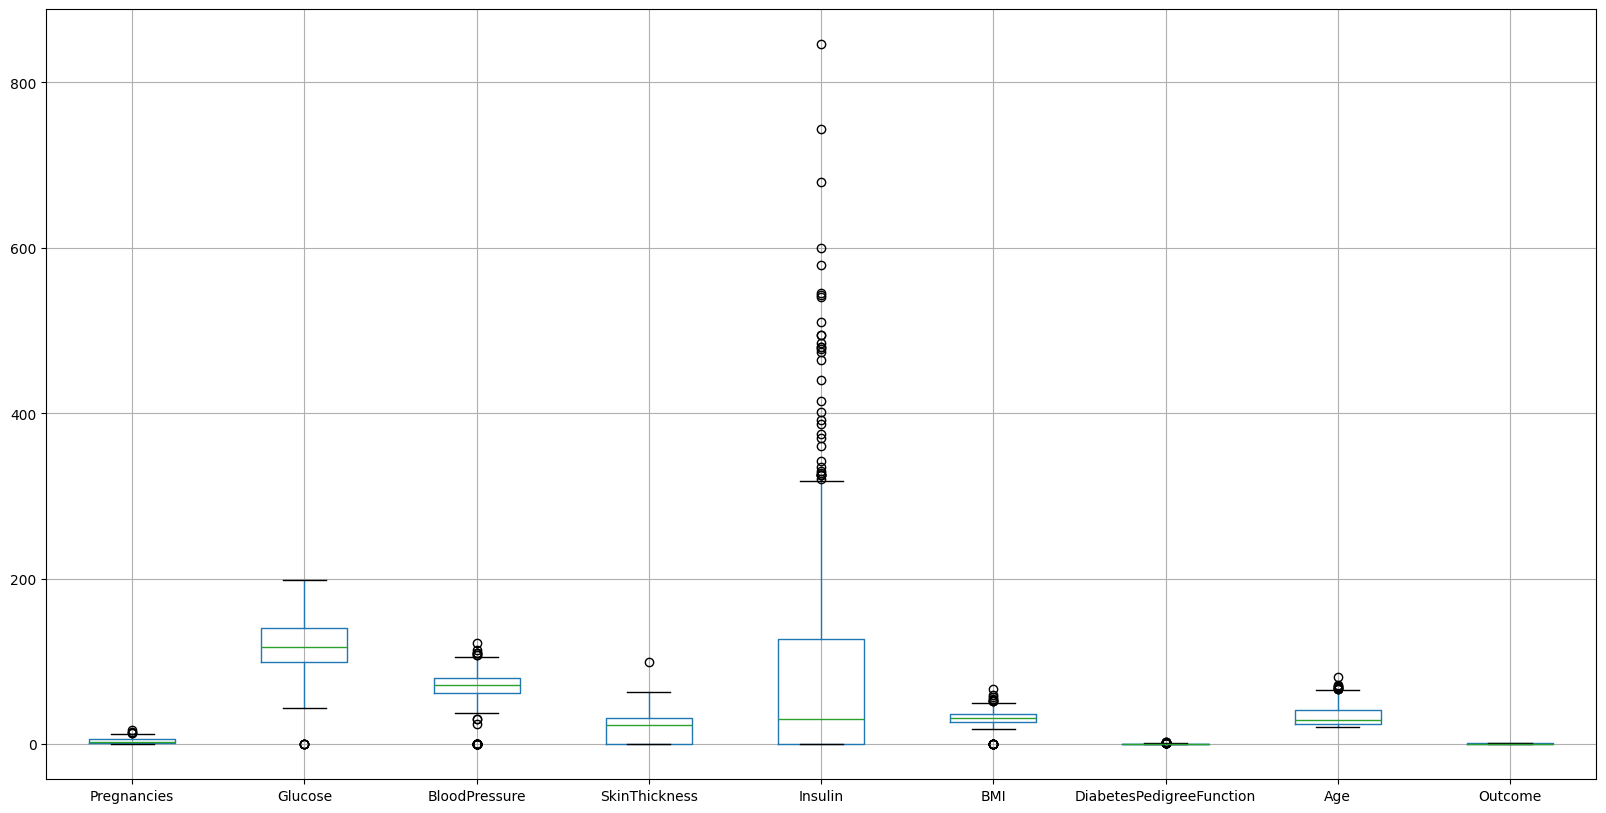

In [90]:
df.boxplot(figsize = (20,10));

In [91]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
import numpy as np

unnormal_col = ['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']

normal_df = df.drop(unnormal_col,axis = 1)

for col in unnormal_col:
  normal_df[col] = df[col].apply(lambda x : np.log1p(x))

sort_col = []
for col in df.columns :
  sort_col.append(col)

normal_df = normal_df[sort_col]

In [93]:
normal_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.106797,0.127069,-0.136511,-0.140051,-0.033333,-0.052485,0.550106,0.179739
Glucose,0.106797,1.000000,0.152590,-0.015427,0.132712,0.221071,0.128726,0.271811,0.466581
BloodPressure,0.127069,0.152590,1.000000,0.188036,0.091950,0.281805,0.043393,0.245741,0.065068
SkinThickness,-0.136511,-0.015427,0.188036,1.000000,0.642225,0.246552,0.174842,-0.188249,-0.007718
Insulin,-0.140051,0.132712,0.091950,0.642225,1.000000,0.160729,0.194186,-0.174518,0.009783
BMI,-0.033333,0.221071,0.281805,0.246552,0.160729,1.000000,0.142476,0.071695,0.292695
DiabetesPedigreeFunction,-0.052485,0.128726,0.043393,0.174842,0.194186,0.142476,1.000000,0.043969,0.179950
Age,0.550106,0.271811,0.245741,-0.188249,-0.174518,0.071695,0.043969,1.000000,0.274247
Outcome,0.179739,0.466581,0.065068,-0.007718,0.009783,0.292695,0.179950,0.274247,1.000000


In [94]:
normal_df.corr('spearman')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130734,0.185127,-0.085222,-0.126723,0.000132,-0.043242,0.607216,0.198689
Glucose,0.130734,1.000000,0.235191,0.060022,0.213206,0.231141,0.091293,0.285045,0.475776
BloodPressure,0.185127,0.235191,1.000000,0.126486,-0.006771,0.292870,0.030046,0.350895,0.142921
SkinThickness,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,0.180390,-0.066795,0.089728
Insulin,-0.126723,0.213206,-0.006771,0.541000,1.000000,0.192726,0.221150,-0.114213,0.066472
BMI,0.000132,0.231141,0.292870,0.443615,0.192726,1.000000,0.141192,0.131186,0.309707
DiabetesPedigreeFunction,-0.043242,0.091293,0.030046,0.180390,0.221150,0.141192,1.000000,0.042909,0.175353
Age,0.607216,0.285045,0.350895,-0.066795,-0.114213,0.131186,0.042909,1.000000,0.309040
Outcome,0.198689,0.475776,0.142921,0.089728,0.066472,0.309707,0.175353,0.309040,1.000000


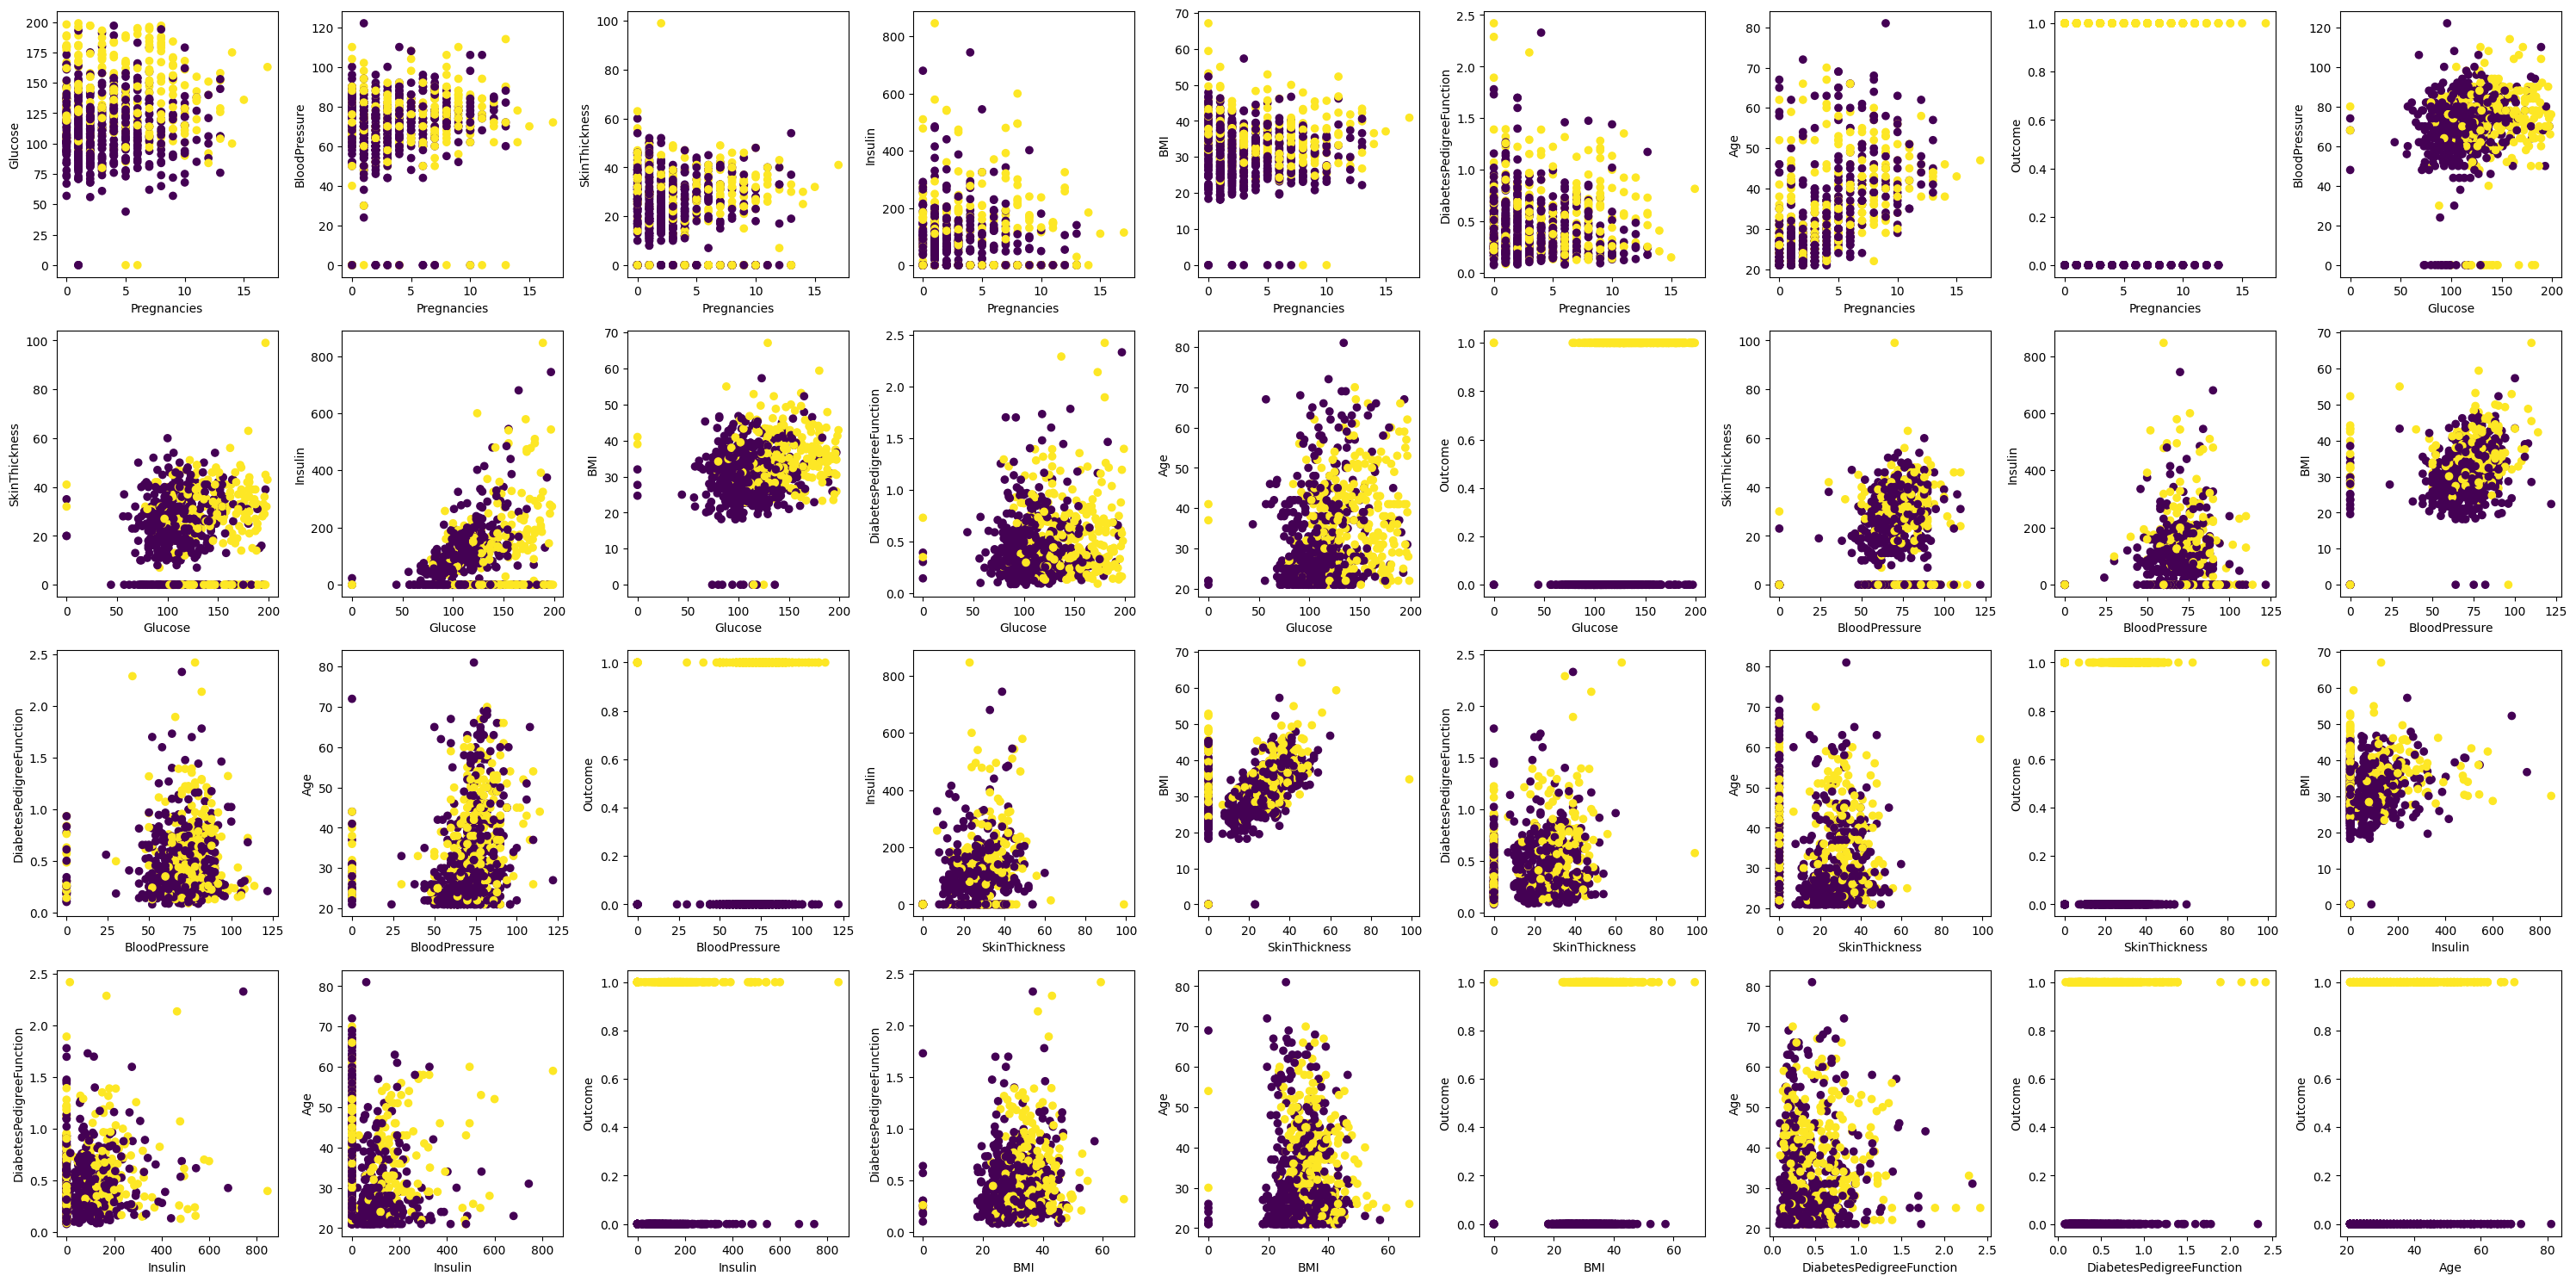

In [95]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,9,figsize = (30,15))


the_axis_zero =[]
m,n=0,0
for i in columns :
  the_axis_zero.append(i)
  for j in columns:
    if i !=j:
      if j not in the_axis_zero:
        ax[m,n].scatter(df[i],df[j],c =df['Outcome'] )
        ax[m,n].set_xlabel(i)
        ax[m,n].set_ylabel(j)
        n+=1
        if n==9:
          n=0
          m+=1
          if m==4:
            m=0
plt.tight_layout()
plt.show()

In [96]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [97]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42,stratify = y)

In [98]:
y_train.value_counts()

,count
Outcome,
0,400
1,214


In [104]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standardize = StandardScaler()
x_train_standard= standardize.fit_transform(x_train)

normalize = MinMaxScaler()
x_train_normal = normalize.fit_transform(x_train)

In [106]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {
    'C' : [0.1,1,10],
    'kernel' :['linear','poly','rbf'],
    'degree': [1,2,3],
    'gamma': ['auto','scale',1]
         }

grid_search1 = GridSearchCV(SVC(),params,cv = 5,scoring= 'recall',n_jobs = -1)
grid_search1.fit(x_train_standard,y_train)

grid_search2=GridSearchCV(SVC(),params,cv = 5,scoring = 'recall',n_jobs = -1)
grid_search2.fit(x_train_normal,y_train)

best_model1 = grid_search1.best_estimator_
print(f'the best parameter for model 1 is: {grid_search1.best_params_}')

best_model2 = grid_search2.best_estimator_
print(f'the best parameter for model 2 is: {grid_search2.best_params_}')

the best parameter for model 1 is: {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}
the best parameter for model 2 is: {'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [109]:
from sklearn.metrics import confusion_matrix

x_test_standard = standardize.transform(x_test)
y_hat1= best_model1.predict(x_test_standard)

x_test_normal =normalize.transform(x_test)
y_hat2=best_model2.predict(x_test_normal)

conf_mat1 = confusion_matrix(y_hat1,y_test)
accuracy1 = (conf_mat1[0,0]+conf_mat1[1,1])/conf_mat1.sum()
recall1 = (conf_mat1[0,0])/(conf_mat1[0,0]+conf_mat1[0,1])

conf_mat2 = confusion_matrix(y_hat2,y_test)
accuracy2 = (conf_mat2[0,0]+conf_mat2[1,1])/conf_mat2.sum()
recall2 = (conf_mat2[0,0])/(conf_mat2[0,0]+conf_mat2[0,1])


print(f'model 1 confusion matrix is : \n{conf_mat1}'
      f'\nmodel 1 accuracy is : {accuracy1}'
      f'\nmodel 1 recall is : {recall1}')

print(f'\nmodel 2 confusion matrix is : \n{conf_mat2}'
      f'\nmodel 2 accuracy is : {accuracy2}'
      f'\nmodel 2 recall is : {recall2}')

model 1 confusion matrix is : 
[[83 26]
 [17 28]]
model 1 accuracy is : 0.7207792207792207
model 1 recall is : 0.7614678899082569

model 2 confusion matrix is : 
[[79 24]
 [21 30]]
model 2 accuracy is : 0.7077922077922078
model 2 recall is : 0.7669902912621359


In [115]:
x2 = normal_df.drop('Outcome',axis = 1)
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y,test_size = 0.3,stratify = y,random_state = 42)

In [117]:
x2_train_standard = standardize.fit_transform(x2_train)
x2_train_normal = normalize.fit_transform(x2_train)

grid_search3 = GridSearchCV(SVC(),params,scoring='recall',cv =5,n_jobs =-1)
grid_search3.fit(x2_train_standard,y2_train)

grid_search4 =GridSearchCV(SVC(),params,scoring = 'recall',cv =5,n_jobs=5)
grid_search4.fit(x2_train_normal,y2_train)

best_model3 = grid_search3.best_estimator_
best_model4 = grid_search4.best_estimator_

print(f'best parameter for model 3 is {grid_search3.best_params_}')
print(f'best parameter for model 4 is {grid_search4.best_params_}')

best parameter for model 3 is {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}
best parameter for model 4 is {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [120]:
x2_test_standard = standardize.transform(x2_test)
x2_test_normal = normalize.transform(x2_test)

y_hat3=best_model3.predict(x2_test_standard)
conf_mat3 = confusion_matrix(y2_test,y_hat3)

y_hat4=best_model4.predict(x2_test_standard)
conf_mat4 = confusion_matrix(y2_test,y_hat4)

accuracy3 = (conf_mat3[0,0]+conf_mat3[1,1])/conf_mat3.sum()
recall3 = (conf_mat3[0,0])/(conf_mat3[0,0]+conf_mat3[0,1])

accuracy4 = (conf_mat4[0,0]+conf_mat4[1,1])/conf_mat4.sum()
recall4 = (conf_mat4[0,0])/(conf_mat4[0,0]+conf_mat4[0,1])


print(f'model 3 confusion matrix is : \n{conf_mat3}'
      f'\nmodel 3 accuracy is : {accuracy3}'
      f'\nmodel 3 recall is : {recall3}')

print(f'\nmodel 4 confusion matrix is : \n{conf_mat4}'
      f'\nmodel 4 accuracy is : {accuracy4}'
      f'\nmodel 4 recall is : {recall4}')

model 3 confusion matrix is : 
[[129  21]
 [ 39  42]]
model 3 accuracy is : 0.7402597402597403
model 3 recall is : 0.86

model 4 confusion matrix is : 
[[64 86]
 [33 48]]
model 4 accuracy is : 0.48484848484848486
model 4 recall is : 0.4266666666666667
